## Assignment 4

* State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.
 
What recreational activities have become more popular in Los Angeles over the past 20 years? Have experienced the most growth over the past 5 years? 


In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [6]:
print(pd.__version__)
#

1.0.1


In [2]:
cal = pd.read_csv('/Users/roberttseng/Desktop/Rob Data Science Projects/ORSAAct_CA _2012_2017.csv')
all_state = pd.read_csv('/Users/roberttseng/Desktop/Rob Data Science Projects/ORSAAct__ALL_AREAS_2012_2017.csv')

In [3]:
# Clean California data set and rename column
cal = cal.dropna()
calrec = cal.iloc[3:, 6:]
calrec = calrec.rename(columns={'Description':'Activity'})
calrec = calrec.set_index('Activity')

In [4]:
# Clean US data set and rename columns
all_state_rec = all_state.filter(items=['GeoName', 'Description', '2012', '2013', '2014', '2015', '2016', '2017'])
all_state_rec = all_state_rec.rename(columns={'GeoName': 'State', 'Description':'Activity'})
all_state_rec = all_state_rec.set_index('Activity')
all_state_rec = all_state_rec.dropna()

In [5]:
# Delete whitespace from every cell
calrec.columns = calrec.columns.str.lstrip('   ')
calrec.index = calrec.index.str.lstrip('   ')
all_state_rec.columns = all_state_rec.columns.str.lstrip('   ')
all_state_rec.index = all_state_rec.index.str.lstrip('   ')

# Only focus on conventional outdoor recreation contributions, drop all supporting and other outdoor recreation segments.
calrec = calrec.drop(index=['Construction', 'Local Trips 6/', 'Travel and Tourism 7/', 'Government Expenditures', 'Other Outdoor Recreation', 'Supporting Outdoor Recreation', 'Transportation', 'Lodging', 'Shopping and Souvenirs', 'State and Local Government', 'Food and Beverages'])
all_state_rec = all_state_rec.drop(index=['Construction', 'Local Trips 6/', 'Travel and Tourism 7/', 'Government Expenditures', 'Other Outdoor Recreation', 'Supporting Outdoor Recreation', 'Transportation', 'Lodging', 'Shopping and Souvenirs', 'State and Local Government', 'Food and Beverages'])

In [7]:
# Divide everything by 1000 to keep the numbers smaller
calrec = calrec.div(1000)
all_state_rec = all_state_rec.iloc[:, 1:].div(1000)

In [8]:
# Get average growth rate over 5 years and sort by values
calrec['Avg Growth %'] = calrec.pct_change(axis='columns').mean(axis='columns').sort_values(ascending=False)

# Get average growth over 5 years in quantity 
calrec['Avg Growth Qty'] = calrec.filter(items=['2012', '2013', '2014', '2015', '2016', '2017']).diff(axis=1).mean(axis=1)
all_state_rec['Avg Growth Qty'] = all_state_rec.filter(items=['2012', '2013', '2014', '2015', '2016', '2017']).diff(axis=1).mean(axis=1)

In [9]:
# Sort by largest impact by Avg Growth Qty
calrec = calrec.sort_values(by=['Avg Growth Qty'], ascending=False)
calrec = calrec.rename(index={"Multi-use Apparel and Accessories (Conventional) 4/": "Apparel and Accessories"})


all_state_rec = all_state_rec.sort_values(by=['Avg Growth Qty'], ascending=False)
all_state_rec = all_state_rec.rename(index={"Multi-use Apparel and Accessories (Conventional) 4/": "Apparel and Accessories"})

In [10]:
# Reset index to be able to use groupby function on Activity 
all_state_rec = all_state_rec.reset_index()

# Reducing US dataframe to top 5 outdoor rec activities across 2012-2017, creating the Avg Annual Pct Change column
top5_allstate = all_state_rec.groupby('Activity').agg(sum).loc[['Apparel and Accessories', 'Amusement Parks/Water Parks', 'Festivals/Sporting Events/Concerts', 'RVing', 'Boating/Fishing']]
top5_allstate_line = top5_allstate.filter(items=['2012', '2013', '2014', '2015', '2016', '2017']).pct_change(axis='columns')
top5_allstate_line = top5_allstate_line.T
top5_allstate_line['Avg Annual Pct Change'] = top5_allstate.filter(items=['2012', '2013', '2014', '2015', '2016', '2017']).pct_change(axis='columns').mean().T

# Reducing California dataframe to top 5 outdoor rec activities across 2012-2017, creating the Avg Annual Pct Change column
top5_cal_line = calrec.filter(items=['2012', '2013', '2014', '2015', '2016', '2017']).pct_change(axis='columns').head().T
top5_cal_line['Avg Annual Pct Change'] = calrec.filter(items=['2012', '2013', '2014', '2015', '2016', '2017']).pct_change(axis='columns').head().mean()

# Dataframe for subplot ax3 with the average growth rates across 
avg_growth_df = pd.concat([top5_allstate_line['Avg Annual Pct Change'], top5_cal_line['Avg Annual Pct Change']], axis=1)


In [11]:
# Labeling and plot variables
xlabels = np.array(calrec.columns.values)
xlabels = np.delete(xlabels, [6,7])
width = 0.4
formatter = ticker.FormatStrFormatter('$%1.0f')
top5_calrec = calrec.filter(items=['2012', '2013', '2014', '2015', '2016', '2017']).head().transpose()
ax1_labels = ['Apparel and Accessories', 'Boating/Fishing', 'Amusement Parks/Water Parks', 'Festivals/Sporting Events/Concerts', 'RVing']
ax3_labels = ['California', 'All States']

# Remove average California growth line to avoid double plotting
top5_cal_line = top5_cal_line.drop(columns=['Avg Annual Pct Change'])


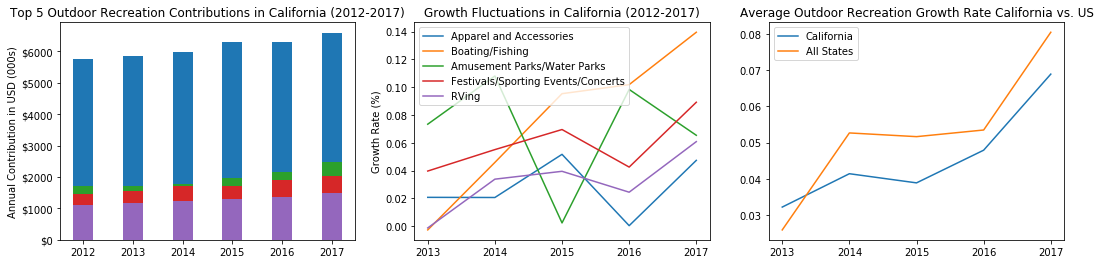

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))

# 1st subplot stacked bar chat to show the size of the GDP contribution in each of the top 5 outdoor rec activities
ax1.bar(xlabels, top5_calrec['Apparel and Accessories'], width)
ax1.bar(xlabels, top5_calrec['Boating/Fishing'], width)
ax1.bar(xlabels, top5_calrec['Amusement Parks/Water Parks'], width)
ax1.bar(xlabels, top5_calrec['Festivals/Sporting Events/Concerts'], width)
ax1.bar(xlabels, top5_calrec['RVing'], width)

# 2nd subplot breaks down the growth rates of each outdoor rec activity in the top 5
ax2.plot(xlabels, top5_cal_line)

# 3rd subplot compare average top 5 california outdoor rec activity growth rate with all of US
ax3.plot(xlabels, avg_growth_df)

ax1.yaxis.set_major_formatter(formatter)
ax1.set_ylabel('Annual Contribution in USD (000s)')
ax1.set_title('Top 5 Outdoor Recreation Contributions in California (2012-2017)')
ax2.set_title('Growth Fluctuations in California (2012-2017)')
ax3.set_title('Average Outdoor Recreation Growth Rate California vs. US')
ax2.legend(labels=ax1_labels, loc=0)
ax3.legend(labels=ax3_labels, loc=0)
ax2.set_ylabel('Growth Rate (%)')
plt.show()